# Рассчет IRR

In [84]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt
import seaborn as sns

Откроем наш датасет и приведем его к удобному для нас виду

In [85]:
data = pd.read_excel("data.xlsx", sheet_name = 6, skiprows = 4)
data=data.drop("Unnamed: 0", axis=1)
data=data.rename(columns={"Unnamed: 1":"Дата"})
data=data.drop(labels=[1], axis=0)
data

,Дата,Instrument 1,Instrument 2,Instrument 3,Instrument 4,Instrument 5,Instrument 6,Instrument 7,Instrument 8,Instrument 9,...,Instrument 11,Instrument 12,Instrument 13,Instrument 14,Instrument 15,Instrument 16,Instrument 17,Instrument 18,Instrument 19,Instrument 20
0,2021-01-01,-106.000000,-117.660000,-119.780000,-124.020000,-130.380000,-125.08,-137.800000,-127.200000,-128.260000,...,-136.740000,-120.840000,-120.840000,-131.440000,-127.200000,-137.800000,-132.500000,-122.960000,-128.260000,-118.720000
2,2022-01-01,8.500000,10.200000,10.115000,9.605000,9.775000,10.71,10.115000,10.030000,9.435000,...,9.860000,10.625000,9.860000,11.050000,10.030000,11.050000,10.370000,10.625000,10.795000,10.200000
3,2023-01-01,8.840000,10.077600,9.812400,11.492000,9.812400,10.2544,10.077600,10.961600,10.342800,...,11.492000,11.315200,9.989200,9.724000,10.961600,10.077600,10.519600,10.431200,11.315200,10.696400
4,2024-01-01,9.193600,11.032320,10.572640,10.112960,11.583936,11.03232,10.572640,10.112960,11.859744,...,11.032320,10.572640,11.675872,11.767808,11.767808,10.940384,10.572640,10.296832,10.940384,10.940384
5,2025-01-01,9.561344,10.517478,11.091159,10.995546,12.047293,12.23852,11.569226,10.899932,12.429747,...,12.334134,11.760453,11.091159,10.804319,12.334134,12.238520,11.664840,11.951680,11.569226,10.517478
6,2026-01-01,9.943798,11.833119,12.429747,11.833119,11.534805,12.031995,11.236491,11.733681,12.131433,...,11.634243,12.031995,12.628623,11.634243,12.827499,10.938178,10.938178,11.037616,10.938178,11.932557
7,2027-01-01,10.341550,11.375705,13.340599,13.030353,12.513275,13.444015,12.926937,11.996198,12.099613,...,12.306444,12.306444,12.409860,13.133768,11.479120,11.996198,12.926937,11.582536,11.582536,11.789367
8,2028-01-01,10.755212,11.938285,12.583598,13.444015,12.260941,12.476046,13.981775,12.476046,13.981775,...,12.798702,13.981775,13.981775,13.121358,11.830733,13.659119,13.551567,13.551567,13.551567,13.874223
9,2029-01-01,11.185420,14.317338,13.646213,12.975087,13.534358,13.086942,12.415816,13.422504,14.093629,...,13.869921,13.198796,13.981775,13.534358,13.086942,13.198796,14.093629,12.415816,14.541046,14.317338
10,2030-01-01,11.632837,13.145106,12.796121,14.541046,13.610419,13.610419,15.006360,14.308389,15.006360,...,14.424718,14.424718,12.796121,13.494091,12.912449,12.796121,13.610419,14.192061,13.959404,14.308389


Датасет содержит в ячейках некоторые числовые выражения, однако можно заметить, что числа записаны не везде, скорее всего такие ячейки были заполнены не правильно, нужно найти все такие ячейки и обработать, так как для подсчета IRR мы будем делать арифметические операции с значениями ячеек.

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 22
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Дата           22 non-null     datetime64[ns]
 1   Instrument 1   22 non-null     float64       
 2   Instrument 2   22 non-null     float64       
 3   Instrument 3   22 non-null     float64       
 4   Instrument 4   22 non-null     float64       
 5   Instrument 5   22 non-null     float64       
 6   Instrument 6   22 non-null     object        
 7   Instrument 7   22 non-null     float64       
 8   Instrument 8   22 non-null     float64       
 9   Instrument 9   22 non-null     float64       
 10  Instrument 10  22 non-null     float64       
 11  Instrument 11  22 non-null     float64       
 12  Instrument 12  22 non-null     float64       
 13  Instrument 13  22 non-null     float64       
 14  Instrument 14  22 non-null     float64       
 15  Instrument 15  22 non-nul

Занулим все нечисловые выражения

In [87]:
data["Instrument 6"]=data["Instrument 6"].apply(lambda x: x if type(x)==float else 0)

Посчитаем IRR для каждого инструмента и отсортируем результат

In [88]:
# Создаем новый DataFrame без столбца с датами
data_values = data.drop('Дата', axis=1)

# Преобразовываем значения в массив numpy
cash_flows = data_values.values

# Указываем ставку дисконтирования
discount_rate = 0.05

# Рассчитываем IRR для каждого инструмента
irr_results = [npf.irr(cash_flow) for cash_flow in cash_flows.T]

# Создаем DataFrame с результатами
result_df = pd.DataFrame({'Instrument': data_values.columns, 'IRR': irr_results})

# Отсортируем по убыванию IRR
result_df_sorted = result_df.sort_values(by='IRR', ascending=False)

result_df_sorted

,Instrument,IRR
15,Instrument 16,0.354593
9,Instrument 10,0.099167
1,Instrument 2,0.098591
11,Instrument 12,0.097934
12,Instrument 13,0.097620
19,Instrument 20,0.097468
2,Instrument 3,0.097288
3,Instrument 4,0.092959
17,Instrument 18,0.092931
14,Instrument 15,0.091318


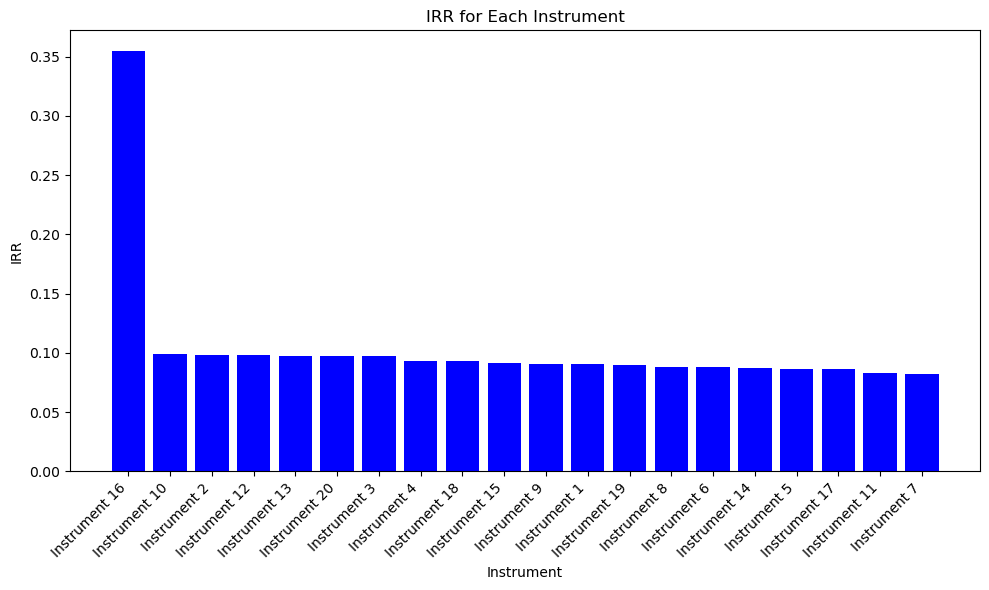

In [89]:
plt.figure(figsize=(10, 6))
plt.bar(result_df_sorted['Instrument'], result_df_sorted['IRR'], color='blue')
plt.title('IRR for Each Instrument')
plt.xlabel('Instrument')
plt.ylabel('IRR')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Можем заметить, что результат для 16го инструмента сильно отличается от остальных, скорее всего это из-за того, что в данных присутствуют вбросы, от которых мы не избавились.

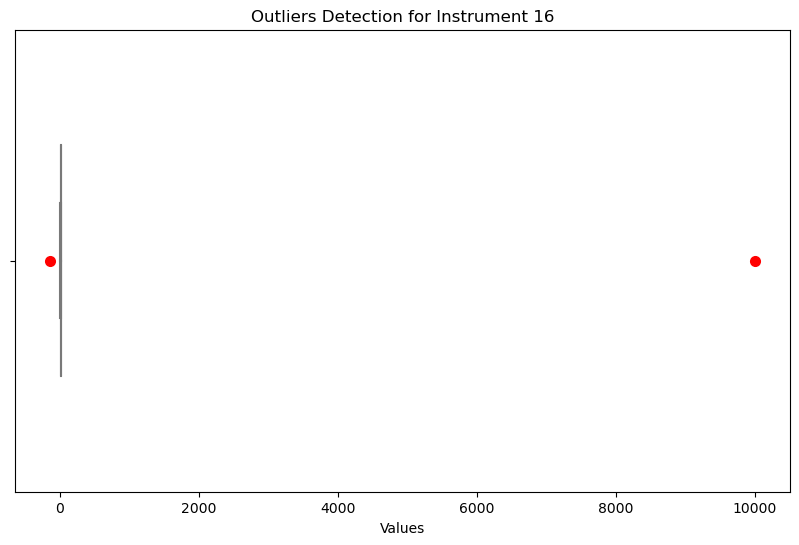

In [90]:
instrument_to_check = 'Instrument 16'

instrument_data = data[instrument_to_check]

# Рассчитываем IQR
Q1 = instrument_data.quantile(0.25)
Q3 = instrument_data.quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для обнаружения выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# выбросы
outliers = (instrument_data < lower_bound) | (instrument_data > upper_bound)

# Визуализация с использованием seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x=instrument_data, color='lightblue', width=0.5)
sns.swarmplot(x=instrument_data[outliers], color='red', size=8)
plt.title(f'Outliers Detection for {instrument_to_check}')
plt.xlabel('Values')
plt.show()

Видим, что выброс равен 10000, обработаем его, заменив на медианное значение

In [91]:
incs=np.array(data.iloc[1:, 1:]).flatten()
med=pd.DataFrame(np.delete(incs, np.argwhere(incomes==10000))).median().values[0]
med

14.846850177730994

In [98]:
data['Instrument 16']

0      -137.800000
2        11.050000
3        10.077600
4        10.940384
5        12.238520
6        10.938178
7        11.996198
8        13.659119
9        13.198796
10       12.796121
11       14.638762
12       14.846850
13       16.618407
14       16.058353
15       17.974469
16    10000.000000
17       19.441185
18       18.308392
19       20.696443
20       21.524300
21       23.280683
22       22.908192
Name: Instrument 16, dtype: float64

In [107]:
data.loc[16,'Instrument 16']=med

Посмотрим на результат теперь:

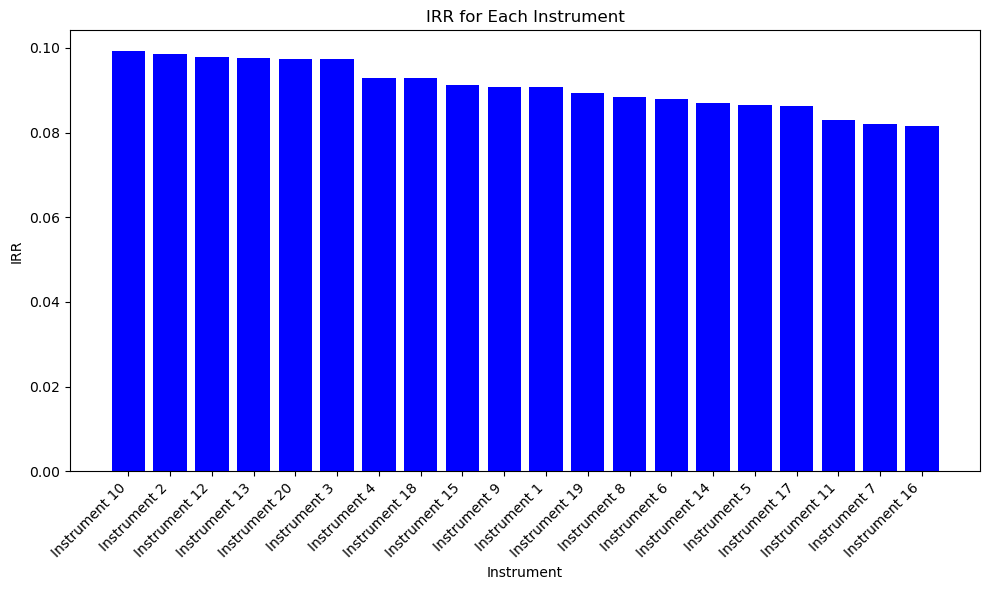

In [106]:
data_values = data.drop('Дата', axis=1)

cash_flows = data_values.values

discount_rate = 0.05

irr_results = [npf.irr(cash_flow) for cash_flow in cash_flows.T]

result_df = pd.DataFrame({'Instrument': data_values.columns, 'IRR': irr_results})

result_df_sorted = result_df.sort_values(by='IRR', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(result_df_sorted['Instrument'], result_df_sorted['IRR'], color='blue')
plt.title('IRR for Each Instrument')
plt.xlabel('Instrument')
plt.ylabel('IRR')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()